In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-pred/train.csv
/kaggle/input/wine-quality-pred/test.csv


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
wine1 = pd.read_csv('../input/wine-quality-pred/train.csv')
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [62]:
wine2 = pd.read_csv('../input/wine-quality-pred/test.csv')
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,9
1,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,11
2,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,14
3,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,15
4,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,17


In [63]:
wine = pd.concat([wine1, wine2], axis=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4


In [64]:
wine.shape

(1599, 13)

In [65]:
print(wine.isna().sum())

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                 456
Id                        0
dtype: int64


In [66]:
wine.quality.fillna(wine.quality.mean(), inplace=True)

In [67]:
wine.quality.value_counts()

5.000000    483
6.000000    462
5.657043    456
7.000000    143
4.000000     33
8.000000     16
3.000000      6
Name: quality, dtype: int64

In [68]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [69]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 455
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
 12  Id                    1599 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 174.9 KB


In [70]:
wine.quality = wine.quality.astype('int')

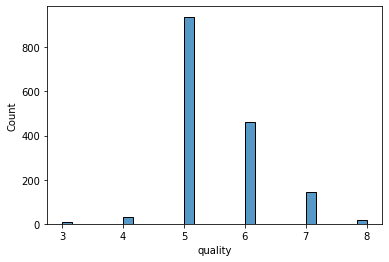

In [71]:
sns.histplot(x='quality', data=wine)
plt.show()

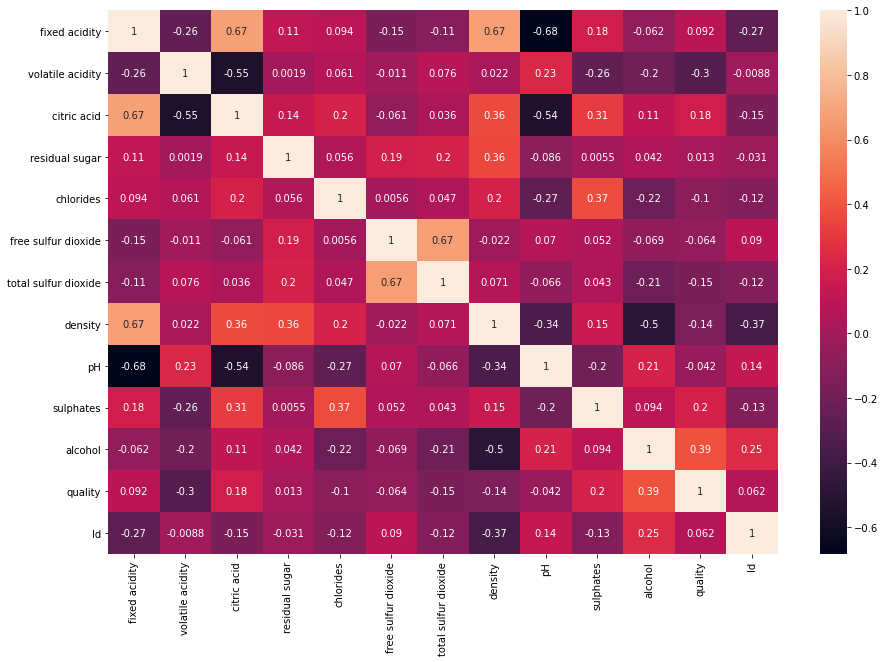

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), annot=True)
plt.show()

In [73]:
wine['GoodQuality'] = [1 if x>=7 else 0 for x in wine['quality']]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,GoodQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [74]:
X = wine.drop(['quality','GoodQuality'], axis=1)
y = wine['GoodQuality']

In [75]:
wine.GoodQuality.value_counts()

0    1440
1     159
Name: GoodQuality, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler
X_feat = X
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [77]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [78]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       429
           1       0.41      0.49      0.45        51

    accuracy                           0.87       480
   macro avg       0.67      0.70      0.69       480
weighted avg       0.88      0.87      0.88       480



In [79]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       429
           1       0.64      0.27      0.38        51

    accuracy                           0.91       480
   macro avg       0.78      0.63      0.67       480
weighted avg       0.89      0.91      0.89       480



In [80]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       429
           1       0.37      0.20      0.26        51

    accuracy                           0.88       480
   macro avg       0.64      0.58      0.60       480
weighted avg       0.85      0.88      0.86       480



In [81]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       429
           1       0.62      0.25      0.36        51

    accuracy                           0.90       480
   macro avg       0.77      0.62      0.65       480
weighted avg       0.89      0.90      0.89       480



In [82]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

[04:30:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       429
           1       0.61      0.39      0.48        51

    accuracy                           0.91       480
   macro avg       0.77      0.68      0.71       480
weighted avg       0.90      0.91      0.90       480



<AxesSubplot:>

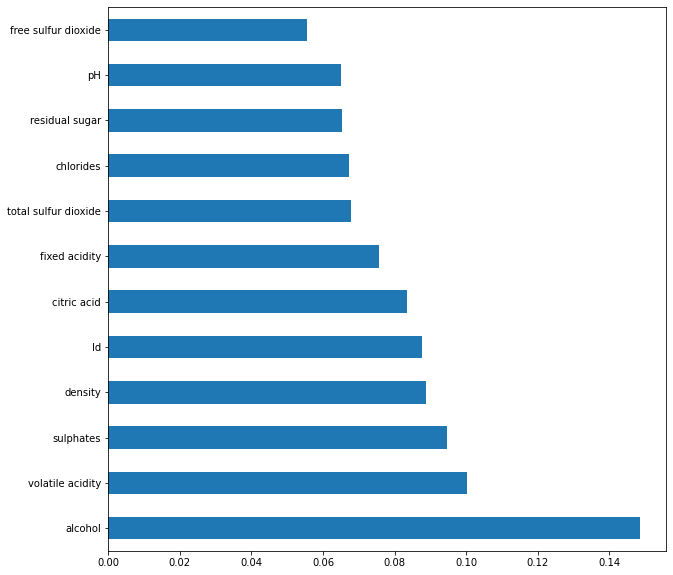

In [83]:
feat_importances = pd.Series(model2.feature_importances_, index=X_feat.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

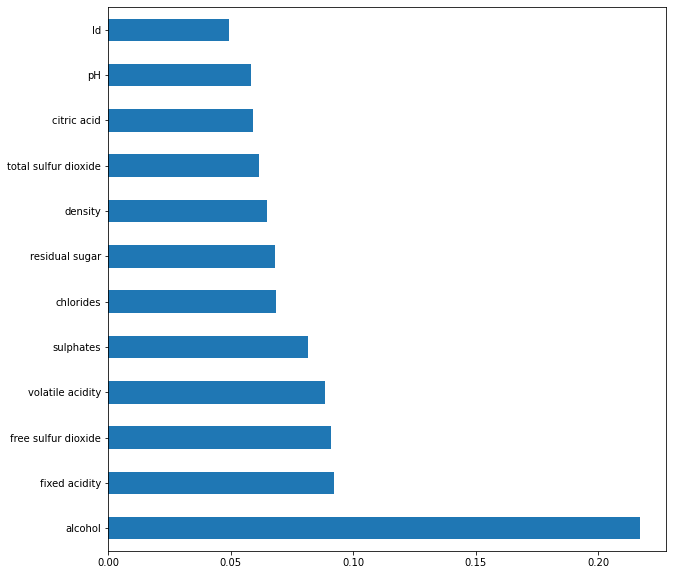

In [84]:
feat_importances = pd.Series(model5.feature_importances_, index=X_feat.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))


In [85]:
df_temp = wine[wine['GoodQuality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,GoodQuality
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0
mean,8.846541,0.395314,0.391195,2.748428,0.074711,14.188679,36.672956,0.996019,3.282453,0.745849,11.528407,7.100629,827.081761,1.0
std,2.097038,0.134869,0.195116,1.400818,0.029154,9.903279,35.612808,0.002283,0.156297,0.141459,1.007960,0.301787,407.161943,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,8.000000,0.990640,2.880000,0.390000,9.200000,7.000000,7.000000,1.0
25%,7.400000,0.300000,0.320000,1.900000,0.062000,6.000000,18.000000,0.994610,3.200000,0.660000,10.800000,7.000000,443.000000,1.0
50%,8.700000,0.360000,0.410000,2.300000,0.073000,12.000000,28.000000,0.995680,3.270000,0.740000,11.600000,7.000000,941.000000,1.0
75%,10.100000,0.480000,0.520000,2.800000,0.083500,17.500000,43.000000,0.997350,3.375000,0.835000,12.250000,7.000000,1100.000000,1.0
max,15.600000,0.850000,0.760000,8.300000,0.358000,53.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1584.000000,1.0


In [86]:
df_temp2 = wine[wine['GoodQuality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,GoodQuality
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.0
mean,8.261458,0.542451,0.257701,2.515660,0.088875,16.061111,47.549306,0.996827,3.314278,0.648465,10.300926,5.289583,795.899306,0.0
std,1.688034,0.177352,0.190229,1.409503,0.048442,10.506529,32.413610,0.001822,0.153902,0.169607,0.999824,0.526071,467.394859,0.0
min,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.0
25%,7.100000,0.410000,0.090000,1.900000,0.071000,8.000000,23.000000,0.995740,3.210000,0.540000,9.500000,5.000000,390.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.000000,0.996800,3.310000,0.610000,10.000000,5.000000,780.500000,0.0
75%,9.100000,0.645000,0.410000,2.600000,0.091000,22.000000,64.000000,0.997900,3.400000,0.710000,10.900000,6.000000,1217.250000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,1598.000000,0.0


In [88]:
my_submission = pd.DataFrame({'Id': wine.Id, 'GoodQuality': wine.GoodQuality})
my_submission.to_csv('submission.csv', index=False)